In [148]:
import pandas as pd
import numpy as np

In [149]:
df= pd.read_csv('spam.csv',encoding="latin1")

In [150]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1848,ham,I dont want to hear philosophy. Just say what ...,NaN,NaN,NaN
2688,ham,Yes I know the cheesy songs from frosty the sn...,NaN,NaN,NaN
5117,ham,Aslamalaikkum....insha allah tohar beeen muht ...,NaN,NaN,NaN
4306,ham,I guess it is useless calling u 4 something im...,NaN,NaN,NaN
1399,ham,You have registered Sinco as Payee. Log in at ...,NaN,NaN,NaN


In [151]:
#DATA CLEANING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [152]:
#dropping null 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [153]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
print(df.head())

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [154]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [155]:
df['target'] = encoder.fit_transform(df['target'])
print(df.head())

   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [156]:
#Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [157]:
#Duplicate values
df.duplicated().sum()

np.int64(403)

In [158]:
df.shape

(5572, 2)

In [159]:
#EDA

In [160]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [161]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

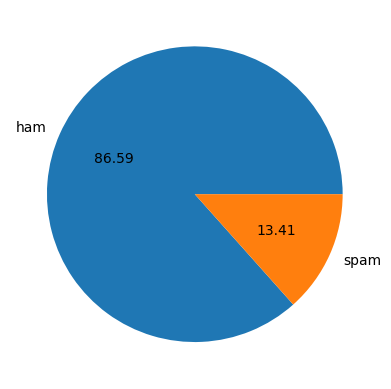

In [162]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [163]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [164]:
import nltk

In [165]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\DIBJYOTI
[nltk_data]     HOTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [166]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [167]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [168]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [169]:
df['num_sentences'] = df['text'].apply(lambda x: len(x.split('.')))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [170]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,15.494436,2.982771
std,59.690841,11.329427,2.601532
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,61.000000,12.000000,2.000000
75%,121.000000,23.000000,4.000000
max,910.000000,171.000000,42.000000


In [171]:
#ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,14.200622,2.966425
std,58.016023,11.424511,2.712165
min,2.000000,1.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,92.000000,19.000000,4.000000
max,910.000000,171.000000,42.000000


In [172]:
#spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,23.851406,3.088353
std,29.183082,5.811898,1.721247
min,13.000000,2.000000,1.000000
25%,132.500000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [173]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

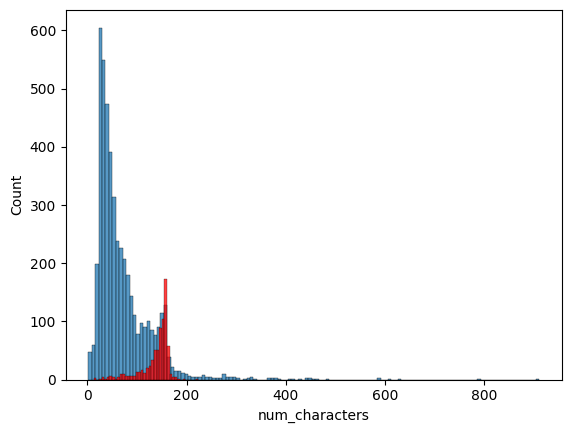

In [174]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

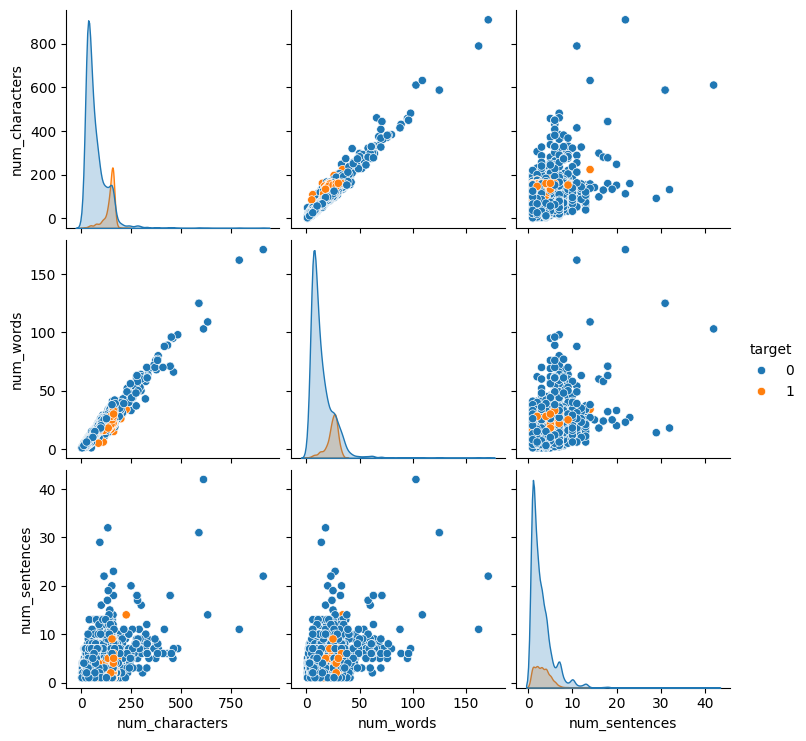

In [175]:
sns.pairplot(df,hue='target')

In [176]:
print(df.dtypes)

target             int64
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


<Axes: >

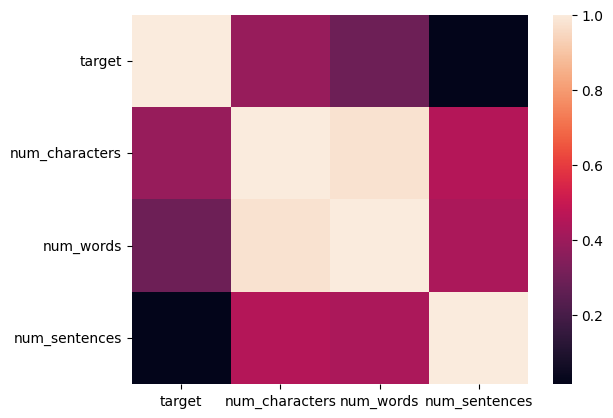

In [177]:
df_numeric = df.select_dtypes(include=['number']) 
sns.heatmap(df_numeric.corr()) 

In [178]:
#Data Preprocessing (lowercase,tokenize,etc)

In [179]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps=PorterStemmer()

def transform_text(text):
    text = text.lower() #lowercasing
    text  = text.split() #making list of words
    #removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [180]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong avail bugi n great world la e cine got amor'

In [181]:
#stemming

In [182]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [183]:
df['tranformed_text']= df['text'].apply(transform_text)

In [184]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [185]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [186]:
from wordcloud import WordCloud
wc= WordCloud(width=400,height=400,min_font_size=10,background_color='white')

In [187]:
spam_wc = wc.generate(df[df['target'] == 1]['tranformed_text'].str.cat(sep=" "))

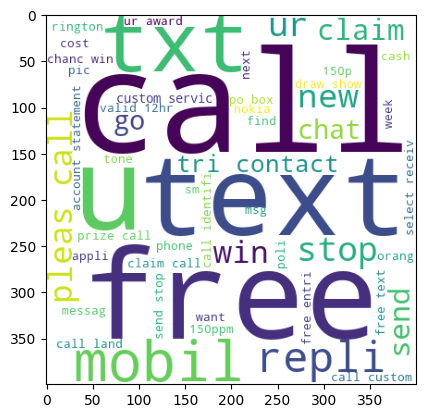

In [188]:
plt.imshow(spam_wc)

In [189]:
ham_wc = wc.generate(df[df['target'] == 0]['tranformed_text'].str.cat(sep=" "))

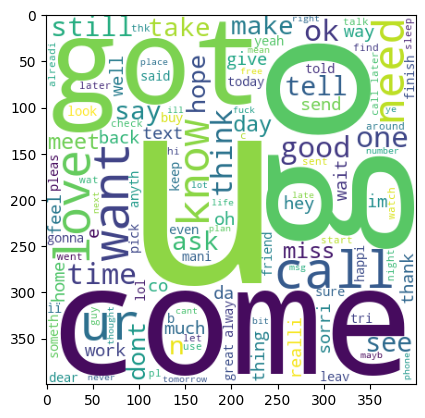

In [190]:
plt.imshow(ham_wc)

In [191]:
#to show most repeated words in ham and spam

In [192]:
k= df[df['target']==1]['tranformed_text'].tolist()

In [193]:
spam_corpus=[]
for msg in k:
    for word in msg.split():
        spam_corpus.append(word)

In [194]:
len(spam_corpus)

9432

In [195]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


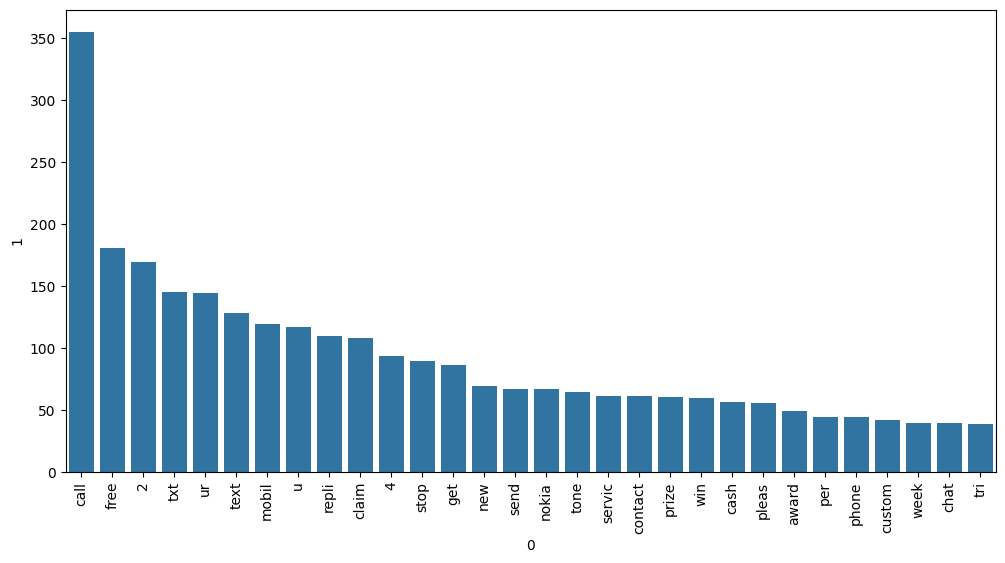

In [196]:
#top words in spam
from collections import Counter
spam_counter = Counter(spam_corpus).most_common(30)
ds = pd.DataFrame(spam_counter, columns=["0", "1"])
plt.figure(figsize=(12,6))
sns.barplot(x=ds["0"], y=ds["1"])
plt.xticks(rotation= 'vertical')
plt.show()


In [197]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [198]:
#top words in ham 
l= df[df['target']==0]['tranformed_text'].tolist()
ham_corpus=[]
for msg in l:
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

29445

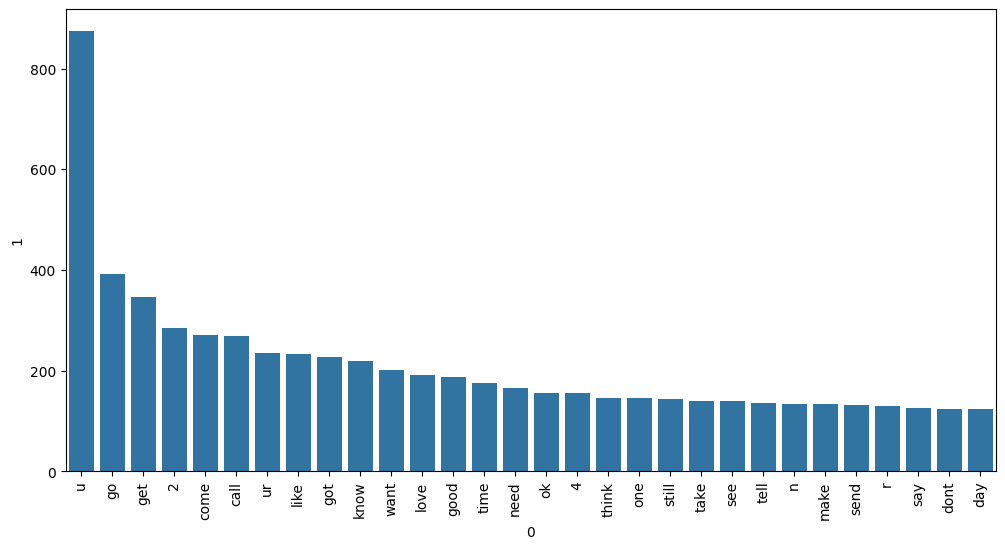

In [199]:
ham_counter = Counter(ham_corpus).most_common(30)
dh = pd.DataFrame(ham_counter, columns=["0", "1"])
plt.figure(figsize=(12,6))
sns.barplot(x=dh["0"], y=dh["1"])
plt.xticks(rotation= 'vertical')
plt.show()

In [200]:
#MODEL BUILDING

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [202]:
x= tfidf.fit_transform(df['tranformed_text']).toarray()
x.shape

(5572, 3000)

In [203]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [204]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [205]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [206]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7937219730941704
[[760 197]
 [ 33 125]]
0.38819875776397517


In [207]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9533632286995516
[[957   0]
 [ 52 106]]
1.0


In [208]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9659192825112107
[[953   4]
 [ 34 124]]
0.96875


In [209]:
# tfidf --> MNB

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [211]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [212]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [213]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [214]:
train_classifier(svc,x_train,y_train,x_test,y_test)


(0.9551569506726457, np.float64(0.9153846153846154))

In [215]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9551569506726457
Precision -  0.9153846153846154
For  KN
Accuracy -  0.9049327354260089
Precision -  1.0
For  NB
Accuracy -  0.9533632286995516
Precision -  1.0
For  DT
Accuracy -  0.9264573991031391
Precision -  0.8518518518518519
For  LR
Accuracy -  0.9417040358744395
Precision -  0.918918918918919
For  RF
Accuracy -  0.9560538116591928
Precision -  0.990990990990991


c:\Users\DIBJYOTI HOTA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9524663677130045
Precision -  0.9411764705882353
For  BgC
Accuracy -  0.95695067264574
Precision -  0.9296875
For  ETC
Accuracy -  0.9695067264573991
Precision -  1.0
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9393939393939394
For  xgb
Accuracy -  0.9497757847533632
Precision -  0.9396551724137931


In [216]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df



,Algorithm,Accuracy,Precision
1,KN,0.904933,1.000000
2,NB,0.953363,1.000000
8,ETC,0.969507,1.000000
5,RF,0.956054,0.990991
6,AdaBoost,0.952466,0.941176
10,xgb,0.949776,0.939655
9,GBDT,0.936323,0.939394
7,BgC,0.956951,0.929688
4,LR,0.941704,0.918919
0,SVC,0.955157,0.915385


In [217]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.904933
1,NB,Accuracy,0.953363
2,ETC,Accuracy,0.969507
3,RF,Accuracy,0.956054
4,AdaBoost,Accuracy,0.952466
5,xgb,Accuracy,0.949776
6,GBDT,Accuracy,0.936323
7,BgC,Accuracy,0.956951
8,LR,Accuracy,0.941704
9,SVC,Accuracy,0.955157


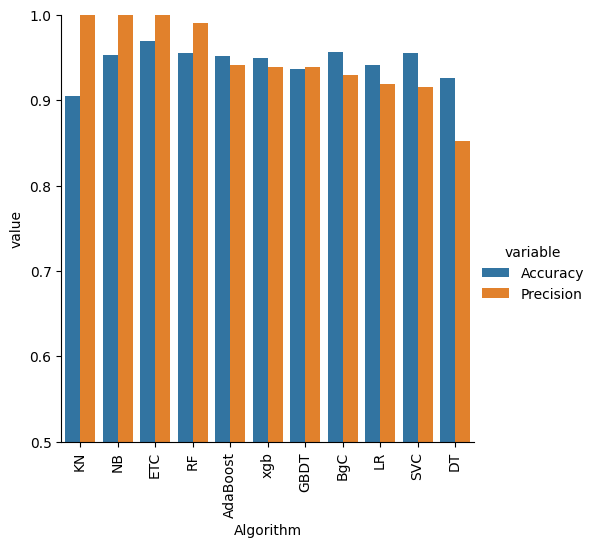

In [218]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [219]:
#Model Improvement
#change the max_features parameters of Ifdf

In [220]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [221]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [222]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [223]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904933,1.000000,0.904933,1.000000,0.904933,1.000000,0.904933,1.000000
1,NB,0.953363,1.000000,0.953363,1.000000,0.953363,1.000000,0.953363,1.000000
2,ETC,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
3,RF,0.956054,0.990991,0.956054,0.990991,0.956054,0.990991,0.956054,0.990991
4,AdaBoost,0.952466,0.941176,0.952466,0.941176,0.952466,0.941176,0.952466,0.941176
5,xgb,0.949776,0.939655,0.949776,0.939655,0.949776,0.939655,0.949776,0.939655
6,GBDT,0.936323,0.939394,0.936323,0.939394,0.936323,0.939394,0.936323,0.939394
7,BgC,0.956951,0.929688,0.956951,0.929688,0.956951,0.929688,0.956951,0.929688
8,LR,0.941704,0.918919,0.941704,0.918919,0.941704,0.918919,0.941704,0.918919
9,SVC,0.955157,0.915385,0.955157,0.915385,0.955157,0.915385,0.955157,0.915385


In [224]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [225]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [226]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.968609865470852
Precision 1.0


In [227]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [228]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)



In [229]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9713004484304932
Precision 0.9772727272727273


In [230]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))